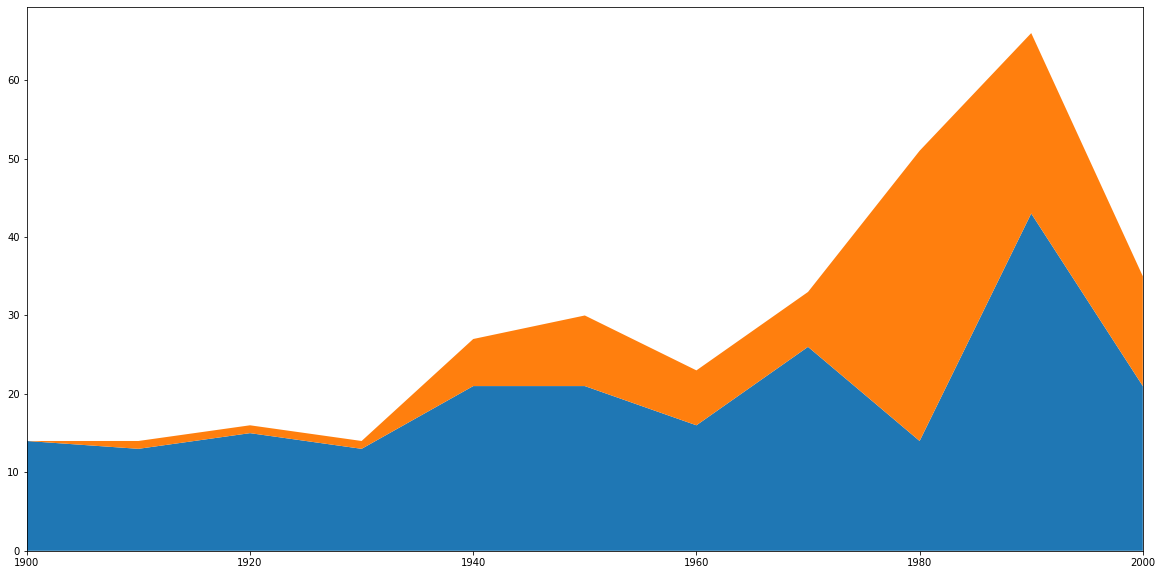

In [14]:
import numpy as np


import pandas as pd
import statsmodels.formula.api as smf
pd.set_option('display.max_columns', 500)
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.graphics as sgr
from statsmodels.formula.api import logit
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

%matplotlib inline

df=pd.read_stata('desktop/WCRWreplication.dta')
dfviol=df.loc[(df['viol']==1)]
dfnonviol=df.loc[(df['nonviol']==1)]
dfviol1=dfviol[['eyear','nonviol','viol']]
dfviol1
dfnonviol1=dfnonviol[['eyear','nonviol','viol']]
dfviolseries=dfviol1.groupby('eyear').count()['viol']
dfnonviolseries=dfnonviol1.groupby('eyear').count()['nonviol']

seriesviol=pd.Series(dfviolseries.index,name='eyearviol') #taking the index from dfviol series

dfnewviol=pd.concat([seriesviol.reset_index(drop=True),dfviolseries.reset_index(drop=True)], axis=1) #creating the dataframe


seriesnonviol=pd.Series(dfnonviolseries.index,name='eyearnonviol') #taking the index from dfnonviolseries series

dfnewnonviol=pd.concat([seriesnonviol.reset_index(drop=True),dfnonviolseries.reset_index(drop=True)], axis=1) #creating the dataframe



#creating the decades
testviol=dfnewviol
testviol['range1']= pd.cut(testviol.eyearviol, [1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010], include_lowest=True)
test1viol=testviol.groupby('range1').sum()['viol']



#creating the decades
test=dfnewnonviol
test['range1']= pd.cut(test.eyearnonviol, [1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010], include_lowest=True)
test2=test.groupby('range1').sum()['nonviol']




dffirst=pd.concat([test2.reset_index(drop=True),test1viol.reset_index(drop=True)], axis=1) #creating the dataframe with both viol and nonviol per decade
dffirst['range1']= [1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000]
x=list(dffirst.range1)
y=[list(dffirst.viol),list(dffirst.nonviol)]

f, ax=plt.subplots(figsize=(20,10))
ax.stackplot(x,y)
ax.set_xlim(xmin=1900,xmax=2000)
plt.show(f)


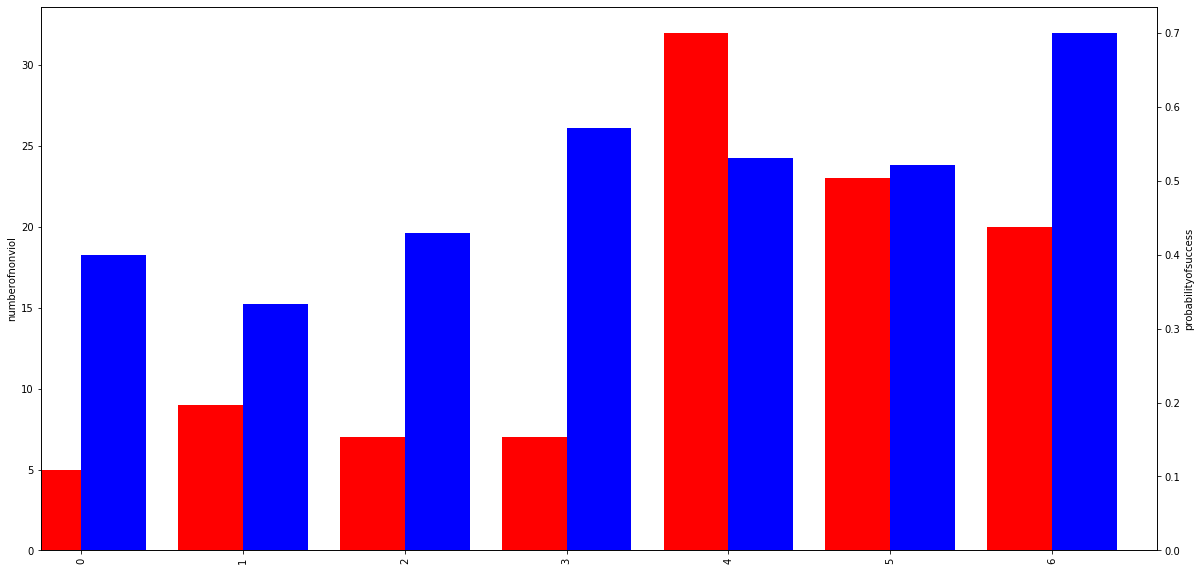

In [19]:
#secondquestion
#nonviol per decade from 1940s
dfnewnonviol=dfnewnonviol.drop(['range1'],axis=1)
dfnewnonviol['rangesec']=pd.cut(test.eyearnonviol, [1939,1949,1959,1969,1979,1989,1999,2009], include_lowest=True)
dfnewnonviol=dfnewnonviol.dropna()
dfnewnonviol=dfnewnonviol.groupby('rangesec').sum()['nonviol']
dfnewnonviol
#nonviol that succeed per decade from 1940s
dfnonviol=df.loc[(df['nonviol']==1)&(df['success']==1)]
dfnonviol=dfnonviol.groupby('eyear').count()['success']
dfnonviol
seriesnonviol=pd.Series(dfnonviol.index,name='eyearnonviol') #taking the index from dfnonviol series
dfnewnonviolsu=pd.concat([seriesnonviol.reset_index(drop=True),dfnonviol.reset_index(drop=True)], axis=1) #creating the dataframe

dfnewnonviolsu=dfnewnonviolsu.dropna()
dfnewnonviolsu['rangesu']=pd.cut(dfnewnonviolsu.eyearnonviol,[1939,1949,1959,1969,1979,1989,1999,2009], include_lowest=True)
dfnewnonviolsu=dfnewnonviolsu.dropna()
dfnewnonviolsu=dfnewnonviolsu.groupby('rangesu').sum()['success']
dfnewnonviolsu
dfnewnonviolsecond=dfnewnonviolsu.divide(dfnewnonviol,fill_value=0) #finding the percentage
seriesnonviolsec=pd.Series(dfnewnonviolsecond.index,name='eyearnonviol')
secondquestiondf=pd.concat([seriesnonviolsec.reset_index(drop=True), dfnewnonviol.reset_index(drop=True),dfnewnonviolsecond.reset_index(drop=True)], axis=1) #creating the dataframe

secondquestiondf.columns=['eyearnonviol','numberofnonviol','probabilityofsuccess']



fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4

secondquestiondf.numberofnonviol.plot(kind='bar', color='red', ax=ax, width=width, position=1,figsize=(20,10))
secondquestiondf.probabilityofsuccess.plot(kind='bar', color='blue', ax=ax2, width=width, position=0)

ax.set_ylabel('numberofnonviol')
ax2.set_ylabel('probabilityofsuccess')

plt.show()


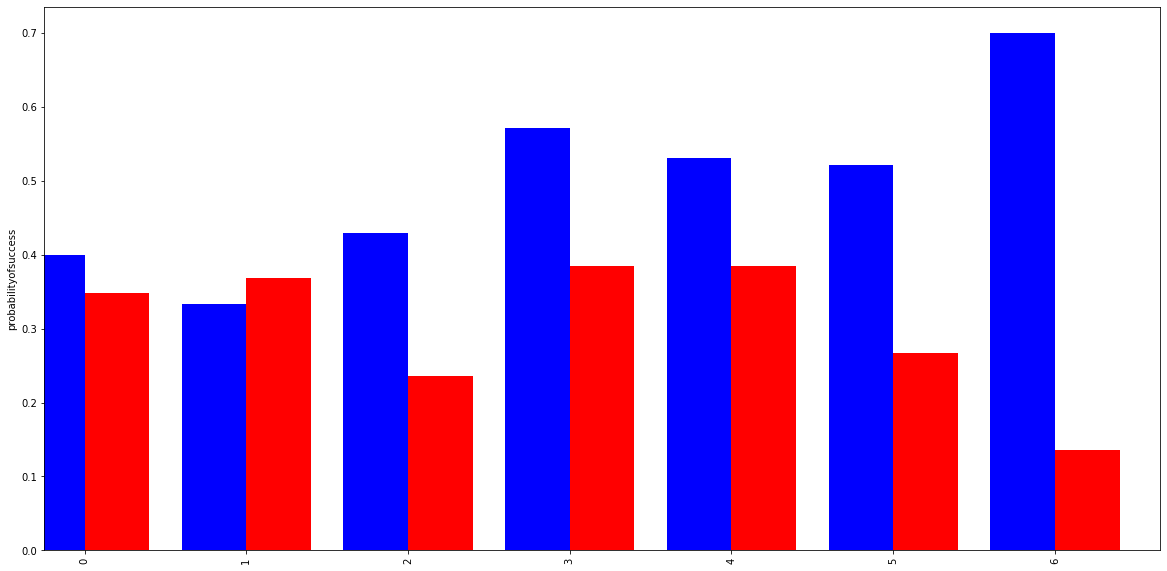

In [14]:
#third question
dfnewviol=dfnewviol.drop(['range1'],axis=1)
dfnewviol['rangethird']=pd.cut(testviol.eyearviol, [1939,1949,1959,1969,1979,1989,1999,2009], include_lowest=True)
dfnewviol=dfnewviol.dropna()
dfnewviol=dfnewviol.groupby('rangethird').sum()['viol']
dfnewviol

#viol that succeed
dfviol=df.loc[(df['viol']==1)&(df['success']==1)]
dfviol=dfviol.groupby('eyear').count()['success']
dfviol
seriesviol=pd.Series(dfviol.index,name='eyearviol') #taking the index from dfviol series
dfnewviolsu=pd.concat([seriesviol.reset_index(drop=True),dfviol.reset_index(drop=True)], axis=1) #creating the dataframe

dfnewviolsu=dfnewviolsu.dropna()
dfnewviolsu['rangesu']=pd.cut(dfnewviolsu.eyearviol,[1939,1949,1959,1969,1979,1989,1999,2009], include_lowest=True)
dfnewviolsu=dfnewviolsu.dropna()
dfnewviolsu=dfnewviolsu.groupby('rangesu').sum()['success']

dfnewviolthird=dfnewviolsu.divide(dfnewviol,fill_value=0)#finding the success rate
seriesviolthird=pd.Series(dfnewviolthird.index,name='eyearviol')
thirdquestiondf=pd.concat([seriesviolthird.reset_index(drop=True), dfnewviol.reset_index(drop=True),dfnewviolthird.reset_index(drop=True)], axis=1) #creating the dataframe

thirdquestiondf.columns=['eyearviol','numberofviol','probabilityofsuccess']


fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes


width = 0.4

secondquestiondf.probabilityofsuccess.plot(kind='bar', color='blue', ax=ax, width=width, position=1,figsize=(20,10))
thirdquestiondf.probabilityofsuccess.plot(kind='bar', color='red', ax=ax, width=width, position=0)

ax.set_ylabel('probabilityofsuccess')


plt.show()

In [4]:
#fourthquestion
df.nlargest(25, 'peakmembership') 
#Greece's riot had 500.000 members and succeed.For more information visit https://en.wikipedia.org/wiki/Apostasia_of_1965

,defect,outcome,peakmembership,eyear,byear,location,campaign,target,lccode,tccode,nonviol,viol,fselfdet,regchange,secession,other,success,limited,failure,ongoing,middleeast,americas,asia,fsu,europe,africa,lpolity,tpolity,lgovcap,tgovcap,regviol,violsim,extfor,statesup,regaid,sdirect,deltatpolity,deltatgdp,lduration,lmembers,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,cw,postcw,ixnNVmem,rgdppc,growthrgdppc,lupop,recur5,recur10,polityt10,polityt1,polityt5,politychanget10,politychanget1,politychanget5,politychanget0,authdum,deltatgovcap,memdum,lnpop,ixnNVpc,lpolity1,lcinc1,lgdppc,wars,lmtnest,ef,loclpolity1,loclcap1,loclcap2,loclcap3,loclcap4,mempc,demdum,recur1
257,0.0,3,4500000.0,1945,1937,China,Chinese rebels,Japanese occupation,710.0,740.0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,NaN,1.0,0.097423,0.067079,1,0,1.0,1,1,1,0.0,NaN,7.979339,15.319588,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,NaN,NaN,10.140613,NaN,NaN,-8.0,NaN,-8.0,NaN,NaN,NaN,NaN,0.0,-4.031550,0.0,NaN,NaN,1.0,0.046317,NaN,NaN,NaN,NaN,-5.0,0.0,0.0,0.0,1.0,NaN,0.0,NaN
206,1.0,5,2000000.0,1979,1977,Iran,Iranian Revolution,Shah Reza Pahlavi,630.0,630.0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,-10.0,-10.0,0.011300,0.011300,1,0,0.0,0,1,0,0.0,6.695317,6.308098,14.508657,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,14.508657,3566.489607,-15.010750,9.311452,1.0,1.0,-6.0,-10.0,-6.0,4.0,0.0,4.0,0.0,1.0,-6.429969,0.0,10.508722,1.380630,-10.0,0.011391,3658.127381,0.0,3.671225,0.668800,-10.0,0.0,0.0,0.0,1.0,1.380630,0.0,1.0
311,1.0,5,2000000.0,1983,1986,Philippines,People Power,Ferdinand Marcos,840.0,840.0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,-6.0,-6.0,0.004994,0.004994,1,1,0.0,0,1,0,0.0,NaN,6.998509,14.508657,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,12.206073,1967.700428,-8.976832,9.433164,0.0,1.0,8.0,1.0,8.0,14.0,7.0,14.0,0.0,1.0,-9.105078,0.0,10.955847,1.324284,-6.0,0.004994,1967.700428,2.0,3.104587,0.160754,-6.0,0.0,0.0,1.0,0.0,1.324284,1.0,0.0
10,0.0,3,1000000.0,2006,2006,Mexico,,Calderon regime,70.0,70.0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,NaN,NaN,NaN,NaN,0,1,0.0,0,0,0,NaN,NaN,5.886104,13.815511,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,13.815511,NaN,NaN,NaN,1.0,1.0,NaN,8.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
38,1.0,5,1000000.0,1985,1984,Brazil,diretas ja,Military rule,140.0,140.0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,-3.0,-3.0,0.024178,0.024178,1,0,0.0,0,0,1,1.0,5.997099,7.286192,13.815511,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,13.815511,4320.933848,1.612760,11.022147,0.0,0.0,8.0,7.0,8.0,11.0,10.0,11.0,0.0,1.0,-6.712846,0.0,11.810257,1.169789,-3.0,0.023356,3946.194477,0.0,1.410987,0.549500,-3.0,0.0,0.0,0.0,1.0,1.169789,1.0,0.0
141,0.0,5,1000000.0,1999,1993,Nigeria,,Military rule,475.0,475.0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,NaN,NaN,0.006310,0.006310,1,0,0.0,0,0,1,NaN,3.600596,7.691657,13.815511,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,13.815511,1002.094193,-0.466884,9.918426,1.0,1.0,NaN,4.0,4.0,NaN,5.0,5.0,NaN,0.0,NaN,0.0,11.670548,1.183793,-5.0,0.007126,981.835098,0.0,1.223776,0.804800,-5.0,0.0,0.0,1.0,0.0,1.183793,0.0,0.0
228,0.0,5,1000000.0,2005,2005,Lebanon,Cedar Revolution,Syrian forces,660.0,652.0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,NaN,NaN,NaN,NaN,1,1,0.0,0,1,0,NaN,NaN,4.094345,13.815511,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,13.815511,NaN,NaN,NaN,1.0,1.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,8.233740,1.677914,-7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.677914,NaN,0.0
255,1.0,5,1000000.0,1949,1922,China,Chinese communist movement,Kuomintang regime,710.0,710.0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,-5.0,-5.0,0.115055,0.115055,1,0,1.0,1,0,0,0.0,NaN,9.750045,13.815511,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,NaN,NaN,10.425223,1.0,1.0,-8.0,-8.0,-8.0,-3.0,-3.0,-3.0,0.0,1.0,-3.544685,0.0,NaN,NaN,-5.0,0.128854,NaN,NaN,NaN,NaN,-5.0,0.0,0.0,0.0,1.0,NaN,0.0,1.0
262,0.0,3,1000000.0,1968,1967,China,Red Guard,anti-Maoists,710.0,710.0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0

In [15]:
#fifth qestion
fifthquestiondf=df.dropna(subset=['mempc','success'])

fifthquestiondf=fifthquestiondf.filter(['success', 'mempc','lnpop'])
fifthquestiondf
mod = logit("success ~ mempc+lnpop", data=fifthquestiondf)
fifthquestiondf
fif_res = mod.fit()
fif_res.params
fif_res.summary()
#One unit increase in mempc brings an increase of 4.4892 in the log odds of success
#So the participation does affect the probability of success

Optimization terminated successfully.
         Current function value: 0.594790
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                success   No. Observations:                  163
Model:                          Logit   Df Residuals:                      160
Method:                           MLE   Df Model:                            2
Date:                Sun, 01 Dec 2019   Pseudo R-squ.:                  0.1294
Time:                        23:23:33   Log-Likelihood:                -96.951
converged:                       True   LL-Null:                       -111.35
Covariance Type:            nonrobust   LLR p-value:                 5.551e-07
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.8199      1.921     -3.030      0.002      -9.584      -2.055
mempc          4.4892      0.986      4.554      0.000       2.557       6.421
lnpop          0.0907      0.129      0.706      0.480      -0.161       0.343
==============================================================================
"""

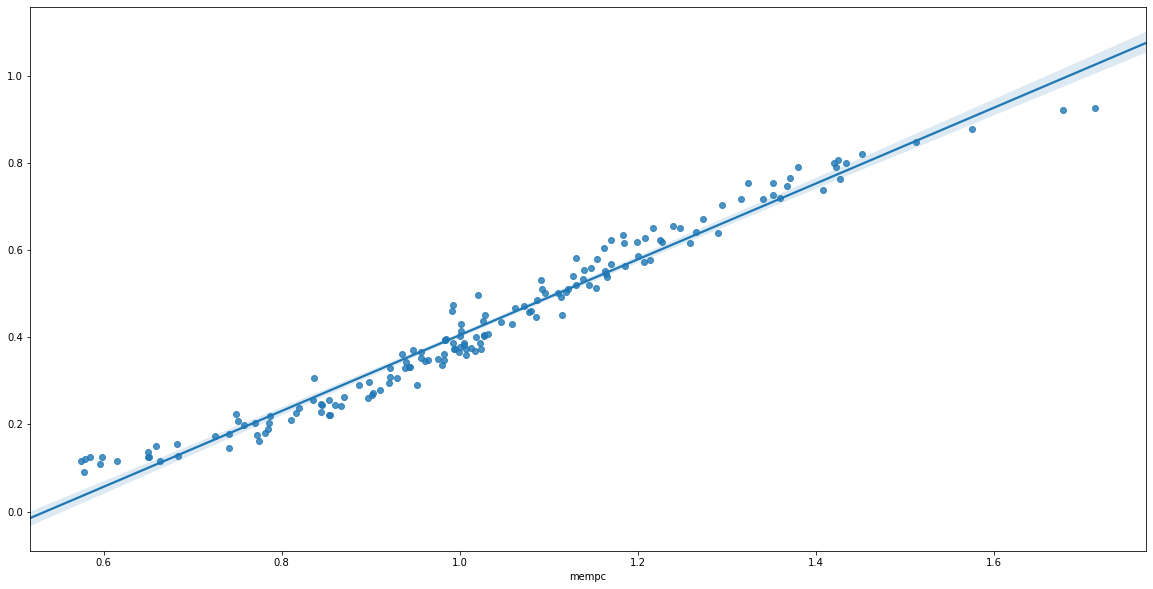

In [16]:
fif_res.predict()
fig = plt.figure(figsize=(20,10)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
fig=sns.regplot(y=fif_res.predict(),x=fifthquestiondf.mempc,data=fifthquestiondf)

In [7]:
#seventh qestion
seventhquestiondf=df.dropna(subset=['tpolity','lmembers','mempc'])

seventhquestiondf=seventhquestiondf.filter(['nonviol','success','tpolity', 'mempc','lnpop'])

seventhquestiondf=seventhquestiondf.loc[(seventhquestiondf['nonviol']==1)]

mod = logit("success ~ mempc+lnpop+tpolity", data=seventhquestiondf)

fif_res1 = mod.fit()
fif_res1.params
fif_res1.summary()
#One unit increase in mempc brings an increase of 5.1032 in the log odds of success
#One unit increase in lnpop brings a decrease of 0.0211 in the log odds of success
#One unit increase in tpolity brings an increase of 0.0353 in the log odds of success
#So for a nonviol riot to succeed it is highly important to have many members and not so important the regime

Optimization terminated successfully.
         Current function value: 0.544594
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                success   No. Observations:                   55
Model:                          Logit   Df Residuals:                       51
Method:                           MLE   Df Model:                            3
Date:                Sun, 01 Dec 2019   Pseudo R-squ.:                  0.1908
Time:                        21:22:14   Log-Likelihood:                -29.953
converged:                       True   LL-Null:                       -37.016
Covariance Type:            nonrobust   LLR p-value:                  0.002739
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.9760      3.857     -1.290      0.197     -12.536       2.584
mempc          5.1032      1.918      2.661      0.008       1.344       8.862
lnpop         -0.0211      0.233     -0.090      0.928      -0.478       0.436
tpolity        0.0353      0.064      0.549      0.583      -0.091       0.161
==============================================================================
"""

In [12]:
#seventh question second part
df1=df.loc[(df['nonviol']==1)]
df1
seventhquestiondf1=df1.filter(['americas','asia','africa', 'europe','fsu','middleeast'])
seventhquestiondf1["category"] =seventhquestiondf1.idxmax(axis=1)
seventhquestiondf1=seventhquestiondf1.replace(['americas','asia','africa', 'europe','fsu','middleeast'], [1, 2, 3, 4,5,6])

seventhquestiondf1['success']=df1['success']
seventhquestiondf1=seventhquestiondf1.filter(['category','success'])
mod = logit("success ~ C(category)", data=seventhquestiondf1)

fif_res1 = mod.fit()
fif_res1.params
fif_res1.summary()
#the average difference between america and asia is -2.5539 in the success of the riot
#the average difference between america and africa is -1.3218 in the success of the riot
#the average difference between america and europe is -1.6835 in the success of the riot
#the average difference between america and fsu is -0.2231 in the success of the riot
#the average difference between america and middle east is -2.0149 in the success of the riot
#So the highest probability for a riot to succeed is in america,then fsu, then africa, then europe,then asia

Optimization terminated successfully.
         Current function value: 0.606986
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                success   No. Observations:                  106
Model:                          Logit   Df Residuals:                      100
Method:                           MLE   Df Model:                            5
Date:                Sun, 01 Dec 2019   Pseudo R-squ.:                  0.1207
Time:                        23:22:55   Log-Likelihood:                -64.341
converged:                       True   LL-Null:                       -73.171
Covariance Type:            nonrobust   LLR p-value:                  0.003402
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.6094      0.632      2.545      0.011       0.370       2.849
C(category)[T.2]    -2.5539      0.774     -3.301      0.001      -4.070      -1.038
C(category)[T.3]    -1.3218      0.771     -1.714      0.086      -2.833       0.189
C(category)[T.4]    -1.6835      0.741     -2.274      0.023      -3.135      -0.232
C(category)[T.5]    -0.2231      1.012     -0.220      0.826      -2.207       1.761
C(category)[T.6]    -2.0149      1.111     -1.814      0.070      -4.192       0.162
====================================================================================
"""

In [17]:
#sixth question

y=fif_res.predict()
fifthquestiondf['Prediction']=y
fifthquestiondf=fifthquestiondf.loc[(fifthquestiondf['Prediction']>0.5)]
fifthquestiondf['mempc'].min()
#So the tipping point is when mempc is higher than 1.0914692

1.0914692